In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
# ignore warning messages
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [3]:
# load and visualize the dataset
df = pd.read_csv('raw_dataset/symptom_disease.csv')
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# visualize description of dataset 
df.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Fungal infection,vomiting,vomiting,fatigue,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,yellowing_of_eyes,irritability,malaise,muscle_pain,chest_pain,chest_pain,blood_in_sputum,muscle_pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


In [5]:
# check for number of null values
null_counts = df.isnull().sum()
null_counts_df = pd.DataFrame({'column': null_counts.index, 'null_count': null_counts.values})
null_counts_df

,column,null_count
0,Disease,0
1,Symptom_1,0
2,Symptom_2,0
3,Symptom_3,0
4,Symptom_4,348
5,Symptom_5,1206
6,Symptom_6,1986
7,Symptom_7,2652
8,Symptom_8,2976
9,Symptom_9,3228


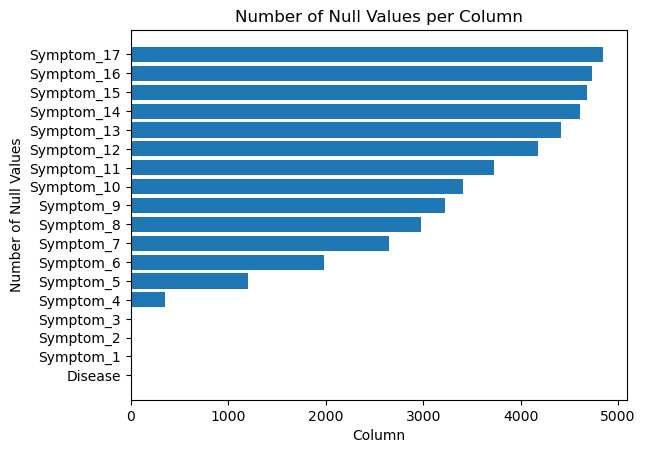

In [6]:
# visualize the null values 
plt.title('Number of Null Values per Column')
plt.barh(null_counts_df['column'], null_counts_df['null_count'])
plt.xlabel('Column')
plt.ylabel('Number of Null Values')
plt.show()

In [7]:
# remove hyphen, trailing space 
for column in df.columns:
    df[column] = df[column].str.replace('_',' ')
    if df[column].dtype == 'Object':
        df[column] = df[column].str.strip()
df.head()    

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin rash,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin rash,nodal skin eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# replace null values with 0
df = df.fillna(0)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,itching,skin rash,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,itching,skin rash,nodal skin eruptions,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
# load symptom severity rank dataset
df_severity = pd.read_csv('raw_dataset/symptom_severity.csv')
df_severity.head()

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


In [10]:
# remove hyphen and trailing space from symptom severity dataset
df_severity['Symptom'] = df_severity['Symptom'].str.replace('_', ' ')
df_severity['Symptom'] = df_severity['Symptom'].str.strip()
df_severity.head()

,Symptom,weight
0,itching,1
1,skin rash,3
2,nodal skin eruptions,4
3,continuous sneezing,4
4,shivering,5


In [11]:
# view symptom severity dataset description
df_severity.describe()

,weight
count,133.000000
mean,4.225564
std,1.323543
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,7.000000


In [12]:
# repeated code to strip the white space
df['Disease'] = df['Disease'].str.strip()
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df_severity = df_severity.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# map the symptom severity rank value onto the disease-symptom dataframe
diseases = df.values
symptoms = df_severity['Symptom'].unique()
num_symptoms = len(symptoms)

for i in range(num_symptoms):
    diseases[diseases == symptoms[i]] = df_severity[df_severity['Symptom'] == symptoms[i]]['weight'].values[0]
    
df = pd.DataFrame(diseases, columns=df.columns)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,1,3,4,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,3,4,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,4,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,3,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
# check to see which symptoms are not ranked
df_select = df.iloc[:, 1:]
non_ints = df_select.select_dtypes(exclude=['number', 'int', 'float']).stack().unique()
non_ints

array([1, 3, 4, 'dischromic  patches', 0, 5, 7, 6, 'spotting  urination',
       2, 'foul smell of urine'], dtype=object)

In [14]:
# replace all unranked symptoms with 0
unranked_symptoms = ['dischromic  patches', 'spotting  urination', 'foul smell of urine']
for sym in unranked_symptoms:
    df = df.replace(sym, 0)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
# check for number of null values again
null_counts = df.isnull().sum()
null_counts_df = pd.DataFrame({'column': null_counts.index, 'null_count': null_counts.values})
null_counts_df

,column,null_count
0,Disease,0
1,Symptom_1,0
2,Symptom_2,0
3,Symptom_3,0
4,Symptom_4,0
5,Symptom_5,0
6,Symptom_6,0
7,Symptom_7,0
8,Symptom_8,0
9,Symptom_9,0


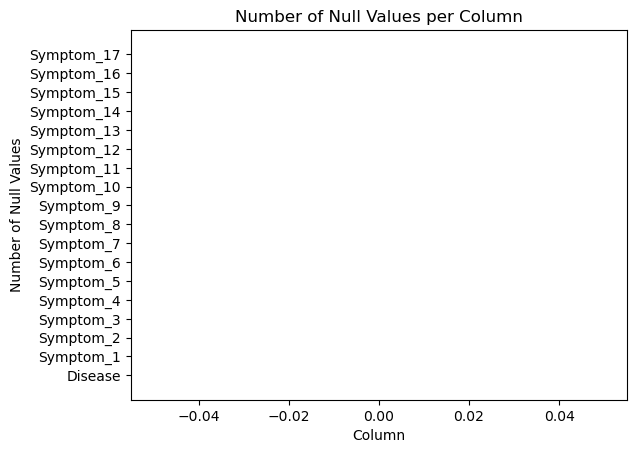

In [16]:
# visualize the null values 
plt.title('Number of Null Values per Column')
plt.barh(null_counts_df['column'], null_counts_df['null_count'])
plt.xlabel('Column')
plt.ylabel('Number of Null Values')
plt.show()

In [17]:
# split dataset
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Decesion Tree

In [18]:
# Perform grid serach to find out optimum parameters for decesion tree
tree = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

tree_best = grid_search.best_estimator_

y_pred_test = tree_best.predict(X_test)
y_pred_train = tree_best.predict(X_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

print("Best parameters:", grid_search.best_params_)
print("Accuracy for testing dataset:", accuracy_test)
print("Accuracy for training dataset:", accuracy_train)

Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy for testing dataset: 0.9949186991869918
Accuracy for training dataset: 0.9951727642276422


In [19]:
# using the optimum parameters to run kFold cross validation test
tree = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=1, min_samples_split=2)

kf = KFold(n_splits=10, shuffle=True)

scores_train = []
scores_test = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    tree.fit(X_train, y_train)
    
    y_pred_test = tree.predict(X_test)
    y_pred_train = tree.predict(X_train)

    accuracy_test = accuracy_score(y_test, y_pred_test)
    accuracy_train = accuracy_score(y_train, y_pred_train)

    scores_test.append(accuracy_test)
    scores_train.append(accuracy_train)

tree_avg_accuracy_test = np.mean(scores_test)
tree_avg_accuracy_train = np.mean(scores_train)
print("Scores for testing dataset: ", scores_test)
print("Average accuracy for testing dataset:", tree_avg_accuracy_test)
print("Scores for training dataset: ", scores_train)
print("Average accuracy for training dataset:", tree_avg_accuracy_train)

Scores for testing dataset:  [0.9979674796747967, 0.9959349593495935, 0.9878048780487805, 0.9898373983739838, 0.9898373983739838, 0.9959349593495935, 0.9939024390243902, 0.9979674796747967, 0.9959349593495935, 0.9959349593495935]
Average accuracy for testing dataset: 0.9941056910569106
Scores for training dataset:  [0.9948057813911473, 0.993676603432701, 0.9959349593495935, 0.9957091237579042, 0.9957091237579042, 0.9950316169828365, 0.9939024390243902, 0.9948057813911473, 0.9950316169828365, 0.9950316169828365]
Average accuracy for training dataset: 0.9949638663053297


k-Nearest Neighbors

In [20]:
# Perform grid serach to find out optimum parameters for knn
knn = KNeighborsClassifier()

param_grid = [
    {
        'weights': ['uniform'], 
        'n_neighbors': [i for i in range(3, 7)]
    },
    {
        'weights': ['distance'],
        'n_neighbors': [i for i in range(3, 7)], 
        'p': [i for i in range(1, 6)]
    }
]

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

knn_best = grid_search.best_estimator_

y_pred_test = knn_best.predict(X_test)
y_pred_train = knn_best.predict(X_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

print("Best parameters:", grid_search.best_params_)
print("Accuracy for testing dataset:", accuracy_test)
print("Accuracy for training dataset:", accuracy_train)

Best parameters: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Accuracy for testing dataset: 0.9959349593495935
Accuracy for training dataset: 0.9950316169828365


In [21]:
# using the optimum parameters to run kFold cross validation test
knn = KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')

kf = KFold(n_splits=10, shuffle=True)

scores_train = []
scores_test = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    knn.fit(X_train, y_train)
    
    y_pred_test = knn.predict(X_test)
    y_pred_train = knn.predict(X_train)

    accuracy_test = accuracy_score(y_test, y_pred_test)
    accuracy_train = accuracy_score(y_train, y_pred_train)

    scores_test.append(accuracy_test)
    scores_train.append(accuracy_train)

knn_avg_accuracy_test = np.mean(scores_test)
knn_avg_accuracy_train = np.mean(scores_train)
print("Scores for testing dataset: ", scores_test)
print("Average accuracy for testing dataset:", knn_avg_accuracy_test)
print("Scores for training dataset: ", scores_train)
print("Average accuracy for training dataset:", knn_avg_accuracy_train)

Scores for testing dataset:  [0.9939024390243902, 0.991869918699187, 0.9979674796747967, 0.9979674796747967, 0.9939024390243902, 0.9939024390243902, 0.9939024390243902, 0.991869918699187, 0.9959349593495935, 0.9939024390243902]
Average accuracy for testing dataset: 0.9945121951219512
Scores for training dataset:  [0.9952574525745257, 0.995483288166215, 0.9948057813911473, 0.9948057813911473, 0.9952574525745257, 0.9952574525745257, 0.9952574525745257, 0.995483288166215, 0.9950316169828365, 0.9952574525745257]
Average accuracy for training dataset: 0.9951897018970189


Naive Bayes

In [22]:
nb = GaussianNB()
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

grid_search = GridSearchCV(nb, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

nb_best = grid_search.best_estimator_

y_pred_test = nb_best.predict(X_test)
y_pred_train = nb_best.predict(X_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

print("Best parameters:", grid_search.best_params_)
print("Accuracy for testing dataset:", accuracy_test)
print("Accuracy for training dataset:", accuracy_train)

Best parameters: {'var_smoothing': 1e-05}
Accuracy for testing dataset: 0.9146341463414634
Accuracy for training dataset: 0.9186991869918699


In [23]:
nb = GaussianNB(var_smoothing=1e-05)

kf = KFold(n_splits=10, shuffle=True)

scores_train = []
scores_test = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    nb.fit(X_train, y_train)
    
    y_pred_test = nb.predict(X_test)
    y_pred_train = nb.predict(X_train)

    accuracy_test = accuracy_score(y_test, y_pred_test)
    accuracy_train = accuracy_score(y_train, y_pred_train)

    scores_test.append(accuracy_test)
    scores_train.append(accuracy_train)

nb_avg_accuracy_test = np.mean(scores_test)
nb_avg_accuracy_train = np.mean(scores_train)
print("Scores for testing dataset: ", scores_test)
print("Average accuracy for testing dataset:", nb_avg_accuracy_test)
print("Scores for training dataset: ", scores_train)
print("Average accuracy for training dataset:", nb_avg_accuracy_train)

Scores for testing dataset:  [0.9065040650406504, 0.9369918699186992, 0.9227642276422764, 0.9065040650406504, 0.8902439024390244, 0.9288617886178862, 0.9288617886178862, 0.9349593495934959, 0.9329268292682927, 0.9044715447154471]
Average accuracy for testing dataset: 0.9193089430894309
Scores for training dataset:  [0.9263775971093045, 0.9202800361336947, 0.9218608852755195, 0.9209575429087624, 0.9254742547425474, 0.9198283649503162, 0.9184733514001807, 0.9150858175248419, 0.9180216802168022, 0.9225383920505872]
Average accuracy for training dataset: 0.9208897922312556


Support Vector Machine

In [24]:
svm_model = SVC()

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'sigmoid']
}

grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

svm_model_best = grid_search.best_estimator_

y_pred_test = svm_model_best.predict(X_test)
y_pred_train = svm_model_best.predict(X_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

print("Best parameters:", grid_search.best_params_)
print("Accuracy for testing dataset:", accuracy_test)
print("Accuracy for training dataset:", accuracy_train)

Best parameters: {'C': 10, 'kernel': 'rbf'}
Accuracy for testing dataset: 0.9817073170731707
Accuracy for training dataset: 0.9911924119241192


In [25]:
svm_model = SVC(C=10, kernel='rbf')

kf = KFold(n_splits=10, shuffle=True)

scores_train = []
scores_test = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    svm_model.fit(X_train, y_train)
    
    y_pred_test = svm_model.predict(X_test)
    y_pred_train = svm_model.predict(X_train)

    accuracy_test = accuracy_score(y_test, y_pred_test)
    accuracy_train = accuracy_score(y_train, y_pred_train)

    scores_test.append(accuracy_test)
    scores_train.append(accuracy_train)

svm_avg_accuracy_test = np.mean(scores_test)
svm_avg_accuracy_train = np.mean(scores_train)
print("Scores for testing dataset: ", scores_test)
print("Average accuracy for testing dataset:", svm_avg_accuracy_test)
print("Scores for training dataset: ", scores_train)
print("Average accuracy for training dataset:", svm_avg_accuracy_train)

Scores for testing dataset:  [0.9878048780487805, 0.9878048780487805, 0.9857723577235772, 0.9898373983739838, 0.9878048780487805, 0.9939024390243902, 0.9959349593495935, 0.9898373983739838, 0.9898373983739838, 0.9878048780487805]
Average accuracy for testing dataset: 0.9896341463414634
Scores for training dataset:  [0.991869918699187, 0.9905149051490515, 0.9920957542908763, 0.9902890695573623, 0.9905149051490515, 0.9911924119241192, 0.99096657633243, 0.9902890695573623, 0.9902890695573623, 0.991869918699187]
Average accuracy for training dataset: 0.9909891598915991


Result Visualization

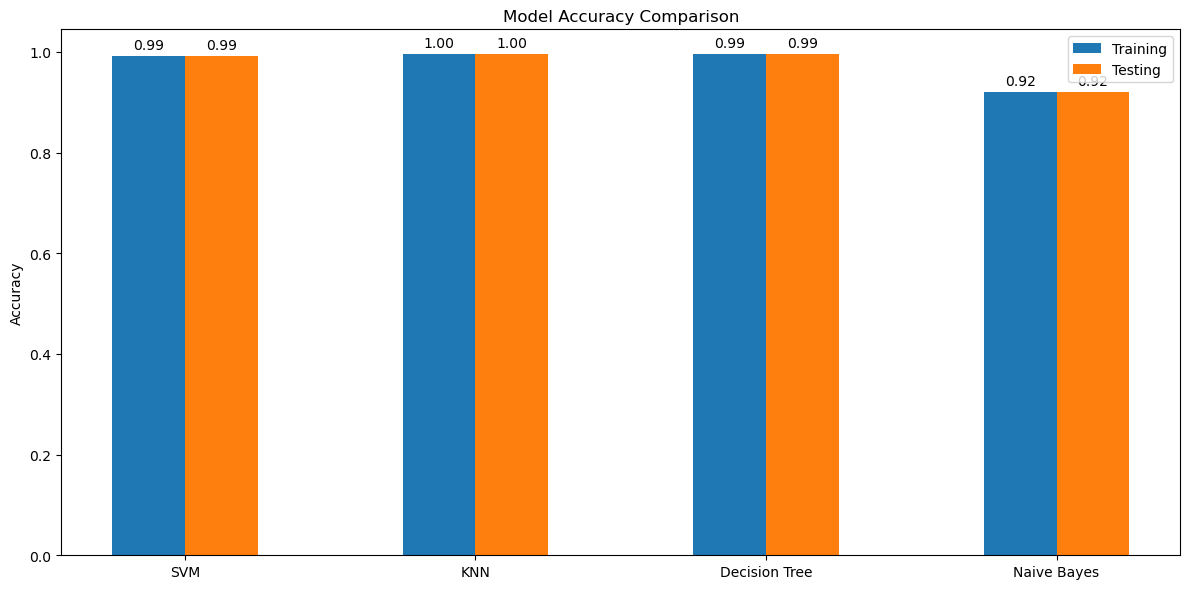

In [32]:
models = ['SVM', 'KNN', 'Decision Tree', 'Naive Bayes']
training_acc = [svm_avg_accuracy_train, knn_avg_accuracy_train, tree_avg_accuracy_train, nb_avg_accuracy_train]
testing_acc = [svm_avg_accuracy_train, knn_avg_accuracy_train, tree_avg_accuracy_train, nb_avg_accuracy_train]

x_pos = np.arange(len(models))
bar_width = 0.25

fig, ax = plt.subplots(figsize=(12,6))
training_bar = ax.bar(x_pos - bar_width/2, training_acc, 0.25, label='Training')
testing_bar = ax.bar(x_pos + bar_width/2, testing_acc, 0.25, label='Testing')

ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracy Comparison')
ax.set_xticks(x_pos)
ax.set_xticklabels(models)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(training_bar)
autolabel(testing_bar)

fig.tight_layout()
plt.show()